In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('2016.xlsx')
data.columns

Index([u'Institution', u'City', u'State/Territory', u'Country', u'Zip Code',
       u'Congressional District', u'Award Number', u'Principal Investigator',
       u'Awarded Amount', u'Action Type', u'Title', u'Award Type',
       u'Org. Code', u'Organization', u'Division',
       u'Program Area/Topic - Subtopic', u'Current Project Period',
       u'Project End Date', u'Institution Type'],
      dtype='object')

In [3]:
data2 = pd.read_excel('2015.xlsx',sheetname='DOE SC Awards FY 2015')
data2.columns

Index([u'Institution', u'City', u'State/Territory', u'Country', u'Zip + 4',
       u'Congressional District', u'Award Number', u'Principal Investigator',
       u'Awarded Amount', u'Action Type', u'Project Title', u'Award Type',
       u'Org. Code', u'Organization', u'Division',
       u'Program Area/Topic - Subtopic', u'Current Project Period',
       u'Project End Date', u'Institution Type'],
      dtype='object')

In [4]:
data3 = pd.read_excel('2014.xlsx',sheetname='DOE SC Awards FY 2014')
data3.columns

Index([u'Institution', u'City', u'State', u'Country', u'Zip + 4',
       u'Congressional District', u'Award Number', u'Principal Investigator',
       u'Awarded Amount', u'Action Type', u'Project Title', u'Award Type',
       u'Org. Code', u'Organization', u'Division',
       u'Program Area/Topic - Subtopic', u'Current Project Period',
       u'Project End Date', u'Institution Type'],
      dtype='object')

In [5]:
data4 = pd.read_excel('2013.xlsx',sheetname='DOE SC Awards FY 2013',skiprows=1)
data4.columns

Index([u'Institution', u'Congressional District *', u'Award Number',
       u'SC Program', u'SC Division', u'Project Title', u'FY 2013 Funding',
       u'City', u'State', u'Award Term Close', u'Principal Investigator(s)'],
      dtype='object')

In [6]:
data5 = pd.read_excel('2012.xlsx',sheetname='DOE SC Awards FY 2012')
data5.columns

Index([u'Institution', u'Congressional District', u'Award Number',
       u'SC Program', u'SC Division', u'Project Title', u'2012 Funding',
       u'City', u'State', u'Award Term Close', u'Principal Investigator(s)',
       u'Latitude', u'Longitude'],
      dtype='object')

In [16]:
institutions = pd.concat([data['Institution'],data2['Institution'],data3['Institution'],data4['Institution'],data5['Institution']],ignore_index=True,axis=0)
districts = pd.concat([data['Congressional District'],data2['Congressional District'],data3['Congressional District'],data4['Congressional District *'],data5['Congressional District']],ignore_index=True,axis=0)
amounts = pd.concat([data['Awarded Amount'],data2['Awarded Amount'],data3['Awarded Amount'],data4['FY 2013 Funding'],data5['2012 Funding']],ignore_index=True,axis=0)
years = pd.Series(np.concatenate([2016*np.ones(len(data)),2015*np.ones(len(data2)),2014*np.ones(len(data3)),2013*np.ones(len(data4)),2012*np.ones(len(data5))]))
states = pd.concat([data['State/Territory'],data2['State/Territory'],data3['State'],data4['State'],data5['State']],ignore_index=True,axis=0)
programs = pd.concat([data['Organization'],data2['Organization'],data3['Organization'],data4['SC Program'],data5['SC Program']],ignore_index=True,axis=0)
fulldata = pd.concat([programs,years,states,districts,institutions,amounts],axis=1,keys=['SC Office', 'Year', 'State', 'District', 'Institution', 'Amount'])

In [23]:
import re
agencies = fulldata['SC Office'].values
abbrev_agencies = []
for entry in list(agencies): 
    test = re.split(r"\(|\)",str(entry))
    if len(test) > 1:
        abbrev_agencies.append(test[1])
    else:
        abbrev_agencies.append(test[0])
fulldata['SC Office'] = abbrev_agencies

hepdata = fulldata[fulldata['SC Office'] == 'HEP']
byDistrict = hepdata.groupby(['District'])

In [64]:
hepdata.to_pickle('hep_grants_2012-2016')

In [58]:
def tell_me_about_district(distcode):
    try: 
        byDistrict.get_group(distcode)
    except KeyError: 
        print 'This district received no SC HEP grants from 2012-2016'
        return
    print 'In the past 5 years, this district has received: ', '${:,.2f}'.format(byDistrict.get_group(distcode)['Amount'].sum())
    print byDistrict.get_group(distcode).groupby(['Institution','Year']).sum()

In [63]:
tell_me_about_district('CA-18')

In the past 5 years, this district has received:  $4,945,000.00
                           Amount
Institution         Year         
Stanford University 2014  2315000
                    2015  1418000
                    2016  1212000


In [10]:
from mpl_toolkits.basemap import Basemap

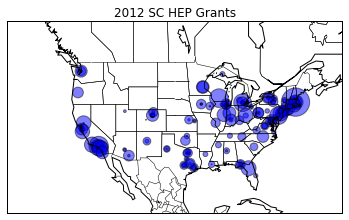

In [11]:
m = Basemap(projection='merc', lat_0 = 0, lon_0=0, llcrnrlat=20,urcrnrlat=55, llcrnrlon=-140,urcrnrlon=-60)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
hepdata5 = data5[data5['SC Program'] == 'HEP']
x,y = m(list(hepdata5['Longitude']),list(hepdata5['Latitude']))
m.scatter(x,y,marker='o',color='b',s=hepdata5['2012 Funding']/10000,alpha=.5,edgecolor='k')
plt.title('2012 SC HEP Grants')

{'LSAD': 'C2', 'AWATER': 98328889, 'RINGNUM': 1, 'CD114FP': '06', 'CDSESSN': '114', 'SHAPENUM': 1, 'AFFGEOID': '5001400US2406', 'GEOID': '2406', 'STATEFP': '24', 'ALAND': 5055929740}
{'LSAD': 'C2', 'AWATER': 527100043, 'RINGNUM': 1, 'CD114FP': '06', 'CDSESSN': '114', 'SHAPENUM': 2, 'AFFGEOID': '5001400US2906', 'GEOID': '2906', 'STATEFP': '29', 'ALAND': 47134020177}
{'LSAD': 'C2', 'AWATER': 325257503, 'RINGNUM': 1, 'CD114FP': '06', 'CDSESSN': '114', 'SHAPENUM': 3, 'AFFGEOID': '5001400US4706', 'GEOID': '4706', 'STATEFP': '47', 'ALAND': 16769383649}
{'LSAD': 'C2', 'AWATER': 354326243, 'RINGNUM': 1, 'CD114FP': '01', 'CDSESSN': '114', 'SHAPENUM': 4, 'AFFGEOID': '5001400US0401', 'GEOID': '0401', 'STATEFP': '04', 'ALAND': 142550296795}
{'LSAD': 'C2', 'AWATER': 264745073, 'RINGNUM': 1, 'CD114FP': '04', 'CDSESSN': '114', 'SHAPENUM': 5, 'AFFGEOID': '5001400US1904', 'GEOID': '1904', 'STATEFP': '19', 'ALAND': 58937778712}
{'LSAD': 'C2', 'AWATER': 399959933, 'RINGNUM': 1, 'CD114FP': '02', 'CDSESSN'

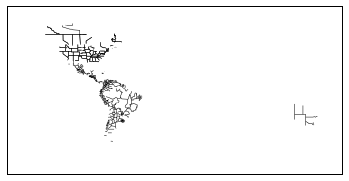

In [15]:
m = Basemap(projection='merc', lat_0 = 0, lon_0=0, llcrnrlat=25,urcrnrlat=50, llcrnrlon=-125,urcrnrlon=-65)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.readshapefile('./cb_2015_us_cd114_5m','cb_2015_us_cd114_5m',drawbounds=False)
for info, shape in zip(m.cb_2015_us_cd114_5m_info, m.cb_2015_us_cd114_5m):
    print info

In [203]:
data5[data5['2012 Funding'] == max(data5['2012 Funding'])]

,Institution,Congressional District,Award Number,SC Program,SC Division,Project Title,2012 Funding,City,State,Award Term Close,Principal Investigator(s),Latitude,Longitude
141,GENERAL ATOMICS,CA-11,DE-FC02-04ER54698,FES,SC-24.2,The DIII-D Fusion Research Program and Advance...,56679000,San Diego,CA,2013-10-31,"Wade, Taylor",32.715329,-117.157255


In [37]:
byState = data.groupby('State/Territory')

In [39]:
byState.sum()

,Awarded Amount
State/Territory,
AK,0.000000e+00
AL,3.948217e+06
AR,3.262502e+06
AZ,7.339997e+06
CA,1.887465e+08
CO,2.708207e+07
CT,1.138357e+07
DC,9.227759e+06
DE,5.053825e+06
